In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [47]:
# Opening the JSONs in DFs
df_a = pd.read_json ('alerts-processed.json', orient = 'records')
df_j = pd.read_json ('jams-processed.json', orient = 'records')

In [48]:
# Change to Datetime format
from datetime import datetime
df_j['pubMillis'] = df_j['pubMillis'].astype(int)
df_j['pubMillis'] = pd.to_datetime(df_j['pubMillis'],unit='ms',origin='unix')
                                   
df_a['pubMillis'] = df_a['pubMillis'].astype(int)
df_a['pubMillis'] = pd.to_datetime(df_a['pubMillis'],unit='ms',origin='unix')

In [49]:
#Getting the specs of each DF
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42737 entries, 0 to 42736
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   location           42737 non-null  object        
 1   pubMillis          42737 non-null  datetime64[ns]
 2   roadType           42479 non-null  float64       
 3   street             41948 non-null  object        
 4   city               41261 non-null  object        
 5   country            42737 non-null  object        
 6   reliability        42737 non-null  int64         
 7   type               42737 non-null  object        
 8   confidence         42737 non-null  int64         
 9   uuid               42737 non-null  object        
 10  subtype            42737 non-null  object        
 11  nThumbsUp          22351 non-null  float64       
 12  reportRating       42737 non-null  int64         
 13  request_time       42737 non-null  datetime64[ns]
 14  report

In [50]:
#Getting the specs of each DF
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58303 entries, 0 to 58302
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   delay              58303 non-null  int64         
 1   pubMillis          58303 non-null  datetime64[ns]
 2   line               58303 non-null  object        
 3   roadType           58303 non-null  int64         
 4   level              58303 non-null  int64         
 5   endNode            53721 non-null  object        
 6   speed              58303 non-null  float64       
 7   city               58125 non-null  object        
 8   country            58303 non-null  object        
 9   street             58267 non-null  object        
 10  length             58303 non-null  int64         
 11  turnType           58303 non-null  object        
 12  type               58303 non-null  object        
 13  uuid               58303 non-null  int64         
 14  reques

In [51]:
# Add Day of Week
df_j['day'] = df_j['request_time'].dt.day_name()
df_a['day'] = df_a['request_time'].dt.day_name()

In [52]:
# Optional: Drop fields with many missing values

In [53]:
# Split hour and date
df_a['dates'] = pd.to_datetime(df_a['request_time']).dt.date
df_a['time'] = pd.to_datetime(df_a['request_time']).dt.hour

df_j['dates'] = pd.to_datetime(df_j['request_time']).dt.date
df_j['time'] = pd.to_datetime(df_j['request_time']).dt.hour

In [54]:
df_a.head()

,location,pubMillis,roadType,street,city,country,reliability,type,confidence,uuid,subtype,nThumbsUp,reportRating,request_time,reportDescription,day,dates,time
0,"{'x': 121.051426, 'y': 14.550786}",2017-07-14 09:49:13.030,1.0,9th Ave,Taguig,RP,5,JAM,0,0b36d5b7-e3e2-3a1f-9b28-59f28101882c,JAM_HEAVY_TRAFFIC,0.0,1,2017-07-14 09:50:29,NaN,Friday,2017-07-14,9
1,"{'x': 121.051426, 'y': 14.550786}",2017-07-14 09:49:13.030,1.0,9th Ave,Taguig,RP,5,JAM,0,0b36d5b7-e3e2-3a1f-9b28-59f28101882c,JAM_HEAVY_TRAFFIC,0.0,1,2017-07-14 09:52:30,NaN,Friday,2017-07-14,9
2,"{'x': 121.051426, 'y': 14.550786}",2017-07-14 09:49:13.030,1.0,9th Ave,Taguig,RP,5,JAM,0,0b36d5b7-e3e2-3a1f-9b28-59f28101882c,JAM_HEAVY_TRAFFIC,0.0,1,2017-07-14 09:54:31,NaN,Friday,2017-07-14,9
3,"{'x': 121.051426, 'y': 14.550786}",2017-07-14 09:49:13.030,1.0,9th Ave,Taguig,RP,5,JAM,0,0b36d5b7-e3e2-3a1f-9b28-59f28101882c,JAM_HEAVY_TRAFFIC,0.0,1,2017-07-14 09:56:32,NaN,Friday,2017-07-14,9
4,"{'x': 121.051426, 'y': 14.550786}",2017-07-14 09:49:13.030,1.0,9th Ave,Taguig,RP,5,JAM,0,0b36d5b7-e3e2-3a1f-9b28-59f28101882c,JAM_HEAVY_TRAFFIC,0.0,1,2017-07-14 09:58:33,NaN,Friday,2017-07-14,9


## Dataprep EDA

In [181]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
from dataprep.eda import plot, plot_correlation, plot_missing

In [182]:
create_report(df_a).show_browser()

100%|#####################################################| 1/1 [00:00<?, ?it/s]

  0%|                                                  | 0/1660 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.9/site-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/opt/anaconda3/lib/python3.9/site-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/opt/anaconda3/lib/python3.9/site-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/opt/anaconda3/lib/python3.9/site-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append metho

In [183]:
create_report(df_j).show_browser()

100%|#####################################################| 1/1 [00:00<?, ?it/s]

  0%|                                                  | 0/2415 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.9/site-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/opt/anaconda3/lib/python3.9/site-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/opt/anaconda3/lib/python3.9/site-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/opt/anaconda3/lib/python3.9/site-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append metho

## Further Exploration

#### SNS Master

In [10]:
sns.set_style('dark') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
plt.rc('font', size=8)          # controls default text sizes

#### Delays in Jams

In [184]:
# Basic findings
df_j['delay'].describe()

count    58303.00000
mean       294.71089
std        429.72427
min         -1.00000
25%        103.00000
50%        164.00000
75%        290.00000
max       7101.00000
Name: delay, dtype: float64

In [185]:
#How much time is wasted in Jams? 
df_j['time_lost'] = (df_j['length']/df_j['speed']/60).round(1)

In [186]:
#Number of 0 speeds
df_j[df_j['speed']==0].count()

delay                79
pubMillis            79
line                 79
roadType             79
level                79
endNode              79
speed                79
city                 79
country              79
street               79
length               79
turnType             79
type                 79
uuid                 79
request_time         79
blockingAlertUuid    76
startNode             0
day                  79
dates                79
time                 79
time_lost            79
dtype: int64

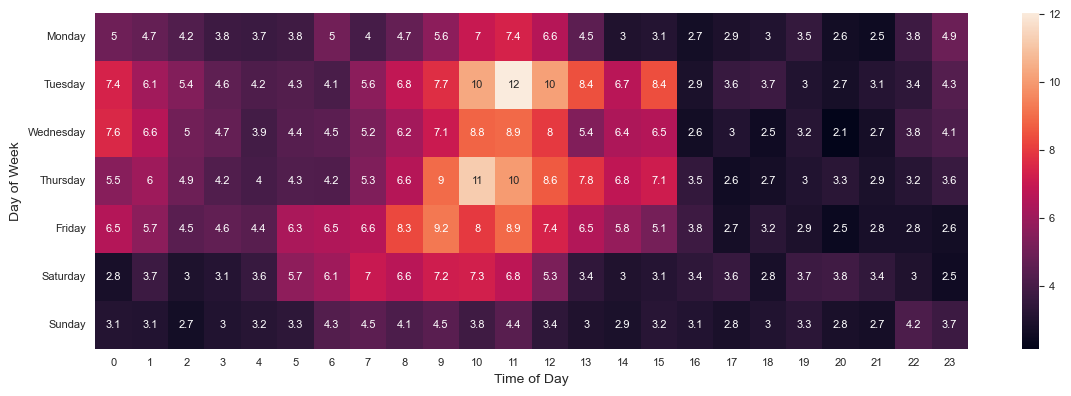

In [195]:
#Average Time lost

plt.figure(figsize=(12,4),tight_layout=True)

df_j3 = df_j['speed'].astype(int)
df_j3 = df_j[df_j['speed']>0]

time_lost_j3 = df_j3.pivot_table(index='day',columns='time', values='time_lost', aggfunc='mean').reindex().transpose()
time_lost_j3 = time_lost_j3[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]].transpose()

sns.heatmap(time_lost_j3,cmap='rocket', annot=True)
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.savefig('ave_time_lost_heatmap.png')
plt.show()

In [175]:
#Dataframe limited by Weekdays, 5 am to 8 pm, no 0 speed values
## df_j2 = df_j.loc[(df_j['time'] >= 5) & (df_j['time'] <= 20)]
## df_j2 = df_j2.loc[(df_j['day'].isin(["Monday","Tuesday","Wednesday","Thursday","Friday"]))]

In [176]:
#Shortest Travel Time
time_lost_min = df_j3['time_lost'].min()

time_lost_min_df = df_j3.loc[df_j3['time_lost']==time_lost_min]
time_lost_min_df.head(2)
## time_lost_min_df['type'].value_counts()

,delay,pubMillis,line,roadType,level,endNode,speed,city,country,street,...,turnType,type,uuid,request_time,blockingAlertUuid,startNode,day,dates,time,time_lost
15,82,2017-07-15 13:04:27.860,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1,3,9th Ave,1.627778,Taguig,RP,Lane O,...,NONE,NONE,1826031756,2017-07-15 13:08:50,<NA>,<NA>,Saturday,2017-07-15,13,2.0
20,81,2017-07-15 13:04:27.860,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1,3,9th Ave,1.644444,Taguig,RP,Lane O,...,NONE,NONE,1826031756,2017-07-15 13:10:50,<NA>,<NA>,Saturday,2017-07-15,13,2.0


In [177]:
#Longest Travel Time
time_lost_max = df_j3['time_lost'].max()

df_j3.loc[df_j3['time_lost']==time_lost_max]

,delay,pubMillis,line,roadType,level,endNode,speed,city,country,street,...,turnType,type,uuid,request_time,blockingAlertUuid,startNode,day,dates,time,time_lost
40245,7094,2017-07-13 06:47:49.471,"[{'x': 121.055993, 'y': 14.540496}, {'x': 121....",6,4,11: C. P. Garcia N,0.313889,Taguig,RP,11: C. P. Garcia N,...,NONE,Huge,1593776194,2017-07-13 10:41:13,NaN,NaN,Thursday,2017-07-13,10,121.5


#### Jams

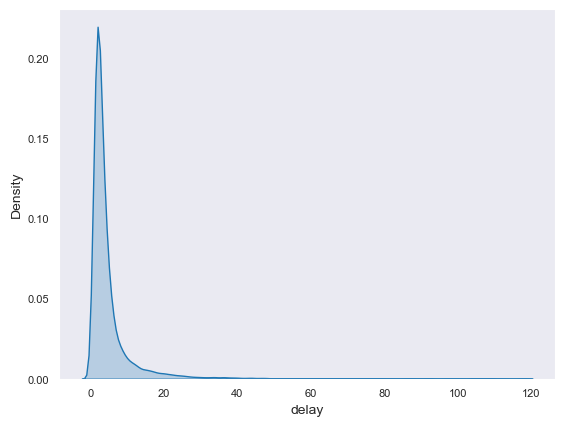

In [196]:
# How reliable is Waze?
delay = (df_j['delay']/60).round()
sns.kdeplot(
   data=delay,
   fill=True, common_norm=False, palette="crest",
)

plt.savefig('delay.png')
plt.show()

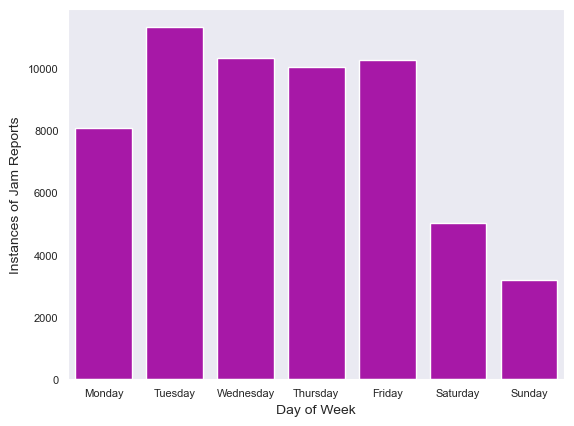

In [197]:
count_jams_day = df_j.groupby('day').count().reset_index()
count_jams_day = count_jams_day[['day','uuid']].set_index('day').reindex(["Monday","Tuesday",
                                                         "Wednesday","Thursday","Friday","Saturday","Sunday"])

sns.barplot(data=count_jams_day,x=count_jams_day.index,y='uuid',color="magma"[3])
plt.xlabel('Day of Week')
plt.ylabel('Instances of Jam Reports')

plt.savefig('count_jams_day.png')
plt.show()

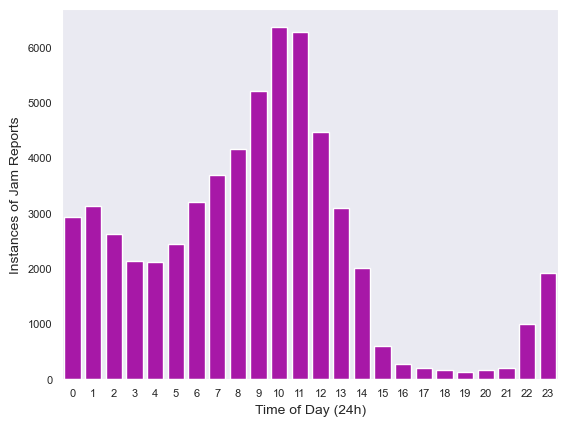

In [198]:
count_jams_time = df_j.groupby('time').count().reset_index()
sns.barplot(data=count_jams_time,x='time',y='uuid',color="magma"[3])
plt.xlabel('Time of Day (24h)')
plt.ylabel('Instances of Jam Reports')

plt.savefig('count_jams_time.png')
plt.show()

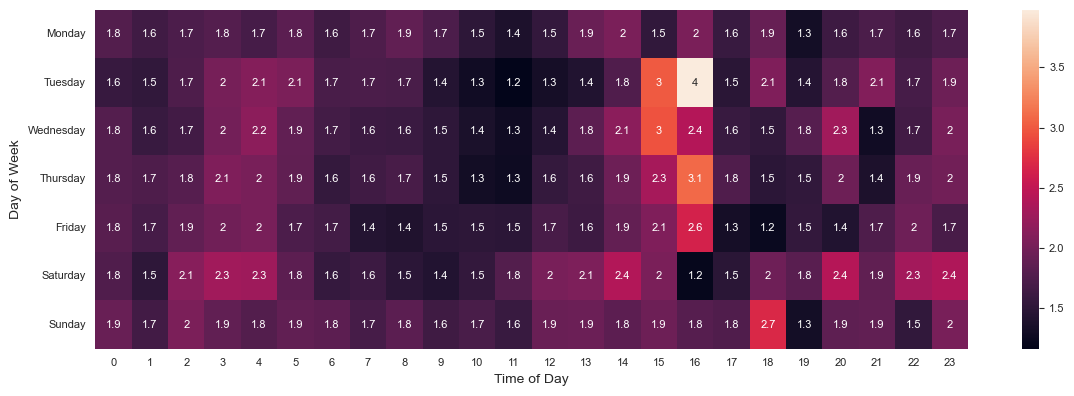

In [200]:
# Average Speed per Time, Day
plt.figure(figsize=(12,4),tight_layout=True)
day_time_j = df_j.pivot_table(index='time',columns='day', values='speed', aggfunc='mean').reindex()
day_time_j = day_time_j[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]].transpose()

sns.heatmap(day_time_j,cmap='rocket', annot=True)
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')

plt.savefig('day_time_speed_heatmap.png')
plt.show()

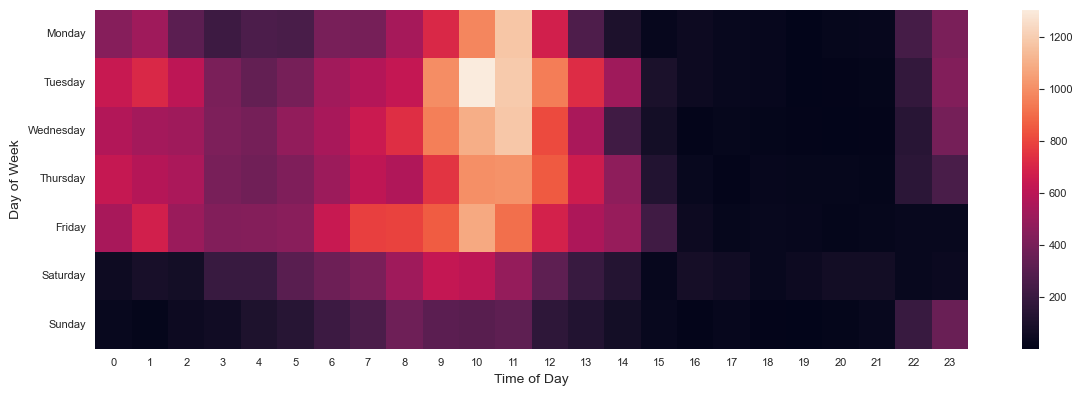

In [201]:
# Count of Jams per Time, Day
plt.figure(figsize=(12,4),tight_layout=True)
day_time_count = df_j.pivot_table(index='time',columns='day', values='uuid', aggfunc='count').reindex()
day_time_count = day_time_count[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]].transpose()

sns.heatmap(day_time_count,cmap='rocket')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')

plt.savefig('day_time_count_heatmap.png')
plt.show()

In [224]:
df_j.pivot_table(index='time',columns='day', values='uuid', aggfunc='count').describe()

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,428.708333,336.125000,208.583333,133.208333,419.083333,472.833333,430.750000
std,339.167841,311.326937,197.258144,125.075970,319.464758,383.806866,357.241637
min,14.000000,3.000000,25.000000,5.000000,12.000000,7.000000,6.000000
25%,32.250000,40.750000,58.250000,28.750000,97.750000,83.750000,60.000000
50%,471.500000,268.500000,106.000000,88.000000,443.500000,474.000000,448.000000
75%,677.250000,461.250000,329.750000,221.750000,619.000000,658.000000,593.500000
max,1081.000000,1171.000000,631.000000,371.000000,1010.000000,1303.000000,1179.000000


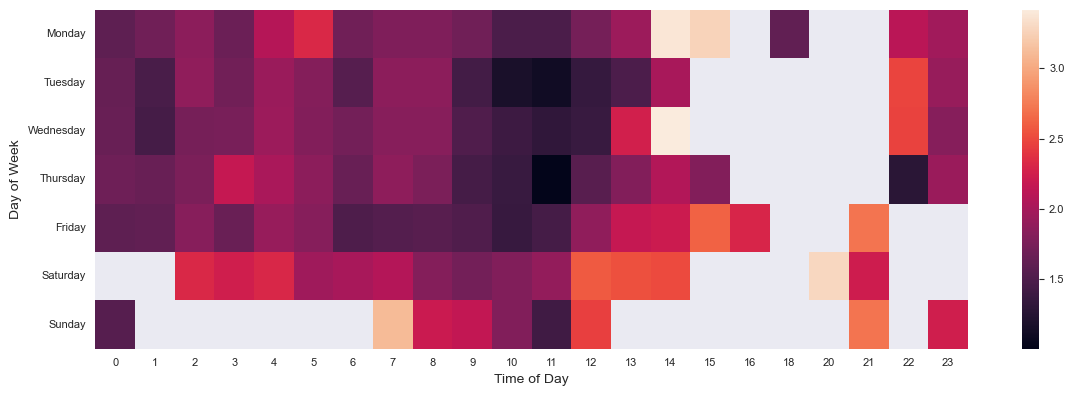

In [202]:
# Average Speed per Time, Day for specific street

street_speed = df_j[df_j['street'] == '32nd']

plt.figure(figsize=(12,4),tight_layout=True)
street_day_time_speed = street_speed.pivot_table(index='time',columns='day', values='speed', aggfunc='mean').reindex()
street_day_time_speed = street_day_time_speed[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]].transpose()

sns.heatmap(street_day_time_speed,cmap='rocket')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')

plt.savefig('street_day_time_speed_heatmap.png')
plt.show()

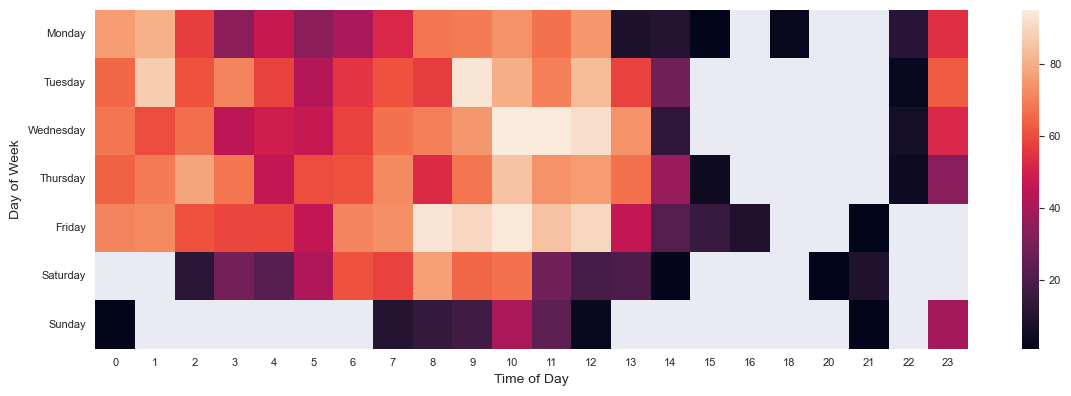

In [203]:
# Average count per Time, Day for specific street

street_count = df_j[df_j['street'] == '32nd']

plt.figure(figsize=(12,4),tight_layout=True)
street_day_time_count = street_count.pivot_table(index='time',columns='day', values='uuid', aggfunc='count').reindex()
street_day_time_count = street_day_time_count[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]].transpose()

sns.heatmap(street_day_time_count,cmap='rocket')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')

plt.savefig('street_day_time_count_heatmap.png')
plt.show()

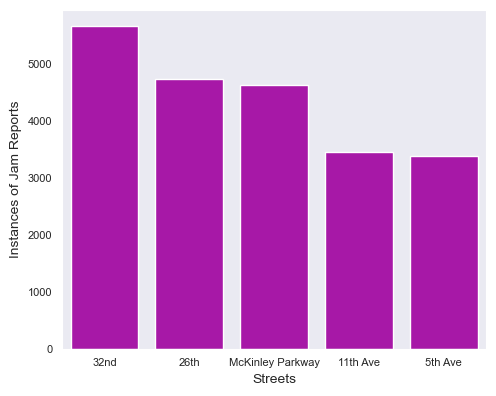

In [204]:
# Top 5 Locations in terms of Count of jams

plt.figure(figsize=(5,4),tight_layout=True)
street_jams_top = df_j.groupby(['street']).count()['uuid'].sort_values(ascending=False).head(5).reset_index()
sns.barplot(data=street_jams_top,x='street',y='uuid',color="magma"[3])
plt.xlabel('Streets')
plt.ylabel('Instances of Jam Reports')

plt.savefig('street_jams.png')
plt.show()

#### Alerts

In [278]:
# Merge on Street, Day, Hour

## Time = df_a['time'] -- hours
## Day = df_a['day'] -- day of week
## Street = df_a['street'] -- street name

## Time = df_j['time'] -- hours
## Day = df_j['day'] -- day of week
## Street = df_j['street'] -- street name

In [124]:
# Group by count of alerts, jams

df_a_grouped = df_a.groupby(['street','time','day']).count()['uuid'].reset_index()
df_j_grouped = df_j.groupby(['street','time','day']).count()['uuid'].reset_index()
df_a_grouped.rename(columns = {'uuid':'count_alerts'}, inplace = True)
df_j_grouped.rename(columns = {'uuid':'count_jams'}, inplace = True)

In [125]:
# Merge count of alerts, jams

combo_df = pd.merge(df_a_grouped, df_j_grouped,  how='outer', on=['street','time','day'])

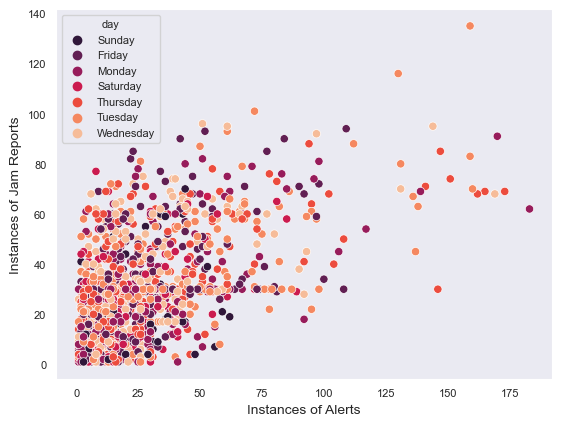

In [205]:
# Check relationship of count of alerts, jams

sns.scatterplot(data=combo_df, x="count_alerts", y="count_jams",hue="day",palette='rocket')
plt.xlabel('Instances of Alerts')
plt.ylabel('Instances of Jam Reports')

plt.savefig('alerts_jams_count.png')

In [130]:
combo_df.corr()

,time,count_alerts,count_jams
time,1.000000,-0.023411,-0.111108
count_alerts,-0.023411,1.000000,0.536916
count_jams,-0.111108,0.536916,1.000000


In [131]:
# Group by time lost and count of alerts

df_a_grouped_time = df_a.groupby(['street','time','day']).count()['uuid'].reset_index()
df_j_grouped_time = df_j.groupby(['street','time','day']).mean()['time_lost'].reset_index()
df_a_grouped_time.rename(columns = {'uuid':'count_alerts'}, inplace = True)

In [132]:
# Merge time lost and count of alert datasets
combo_df_time = pd.merge(df_a_grouped_time, df_j_grouped_time,  how='outer', on=['street','time','day'])

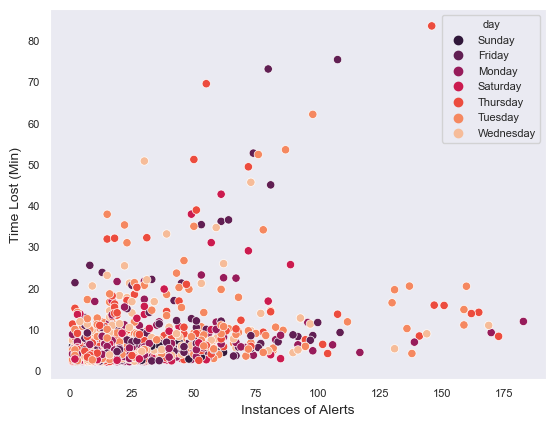

In [206]:
# Check relationship of time lost and count of alerts

sns.scatterplot(data=combo_df_time, x="count_alerts", y="time_lost",hue="day",palette='rocket')
plt.xlabel('Instances of Alerts')
plt.ylabel('Time Lost (Min)')

plt.savefig('alerts_jams_time.png')

In [143]:
combo_df_time.corr()

,time,count_alerts,time_lost
time,1.000000,-0.023411,-0.019103
count_alerts,-0.023411,1.000000,0.358997
time_lost,-0.019103,0.358997,1.000000


In [144]:
# Group by speed and count of alerts

df_a_grouped_speed = df_a.groupby(['street','time','day']).count()['uuid'].reset_index()
df_j_grouped_speed = df_j.groupby(['street','time','day']).mean()['speed'].reset_index()
df_a_grouped_speed.rename(columns = {'uuid':'count_alerts'}, inplace = True)

In [145]:
# Merge time lost and count of alert datasets
combo_df_speed = pd.merge(df_a_grouped_speed, df_j_grouped_speed,  how='outer', on=['street','time','day'])

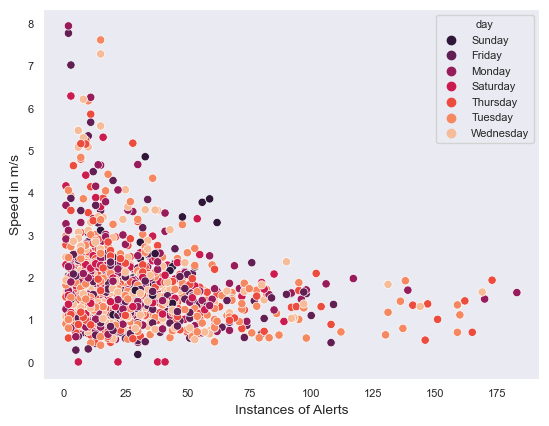

In [230]:
# Check relationship of speed and count of alerts

sns.scatterplot(data=combo_df_speed, x="count_alerts", y="speed",hue="day",palette='rocket')
plt.xlabel('Instances of Alerts')
plt.ylabel('Speed in m/s')

plt.savefig('alerts_jams_speed.png')

In [147]:
combo_df_speed.corr()

,time,count_alerts,speed
time,1.000000,-0.023411,0.032561
count_alerts,-0.023411,1.000000,-0.164434
speed,0.032561,-0.164434,1.000000


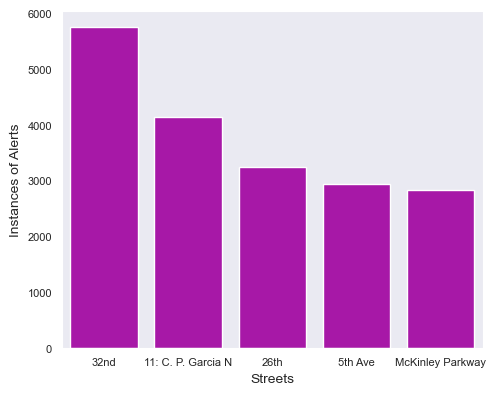

In [208]:
# Top 5 Locations in terms of Count of Alerts

plt.figure(figsize=(5,4),tight_layout=True)
street_alerts_top = df_a.groupby(['street']).count()['uuid'].sort_values(ascending=False).head(5).reset_index()
sns.barplot(data=street_alerts_top,x='street',y='uuid',color="magma"[3])
plt.xlabel('Streets')
plt.ylabel('Instances of Alerts')

plt.savefig('street_alerts.png')
plt.show()

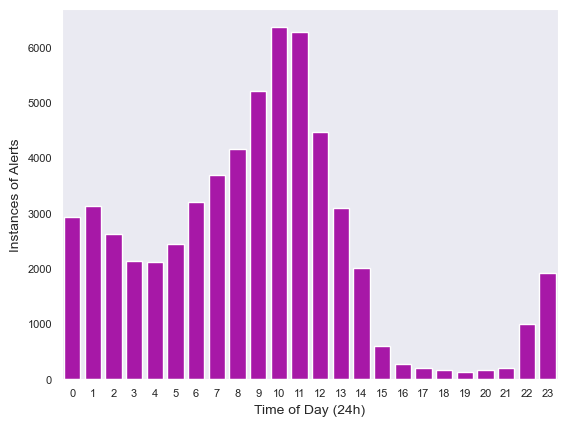

In [209]:
# Alerts per Time of Day

count_alerts_time = df_j.groupby('time').count().reset_index()
sns.barplot(data=count_alerts_time,x='time',y='uuid',color="magma"[3])
plt.xlabel('Time of Day (24h)')
plt.ylabel('Instances of Alerts')

plt.savefig('time_alerts.png')
plt.show()

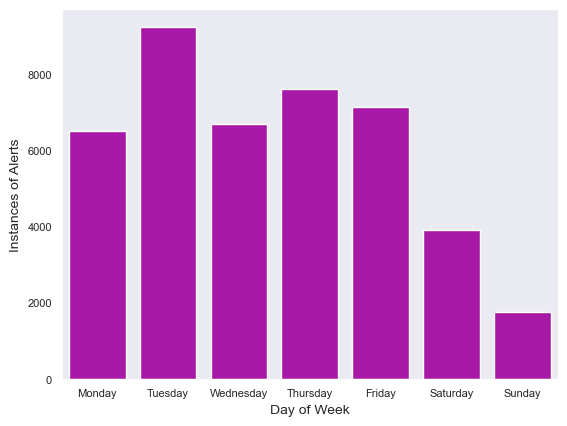

In [210]:
# Instances of Alerts per Day

count_alerts_day = df_a.groupby('day').count().reset_index()
count_alerts_day = count_alerts_day[['day','uuid']].set_index('day').reindex(["Monday","Tuesday",
                                                         "Wednesday","Thursday","Friday","Saturday","Sunday"])

sns.barplot(data=count_alerts_day,x=count_alerts_day.index,y='uuid',color="magma"[3])
plt.xlabel('Day of Week')
plt.ylabel('Instances of Alerts')

plt.savefig('count_alerts_day.png')
plt.show()

In [233]:
count_subtype = df_a.subtype.value_counts().head(10).rename_axis('subtype').reset_index(name='counts')
count_subtype

,subtype,counts
0,JAM_HEAVY_TRAFFIC,17803
1,JAM_STAND_STILL_TRAFFIC,13891
2,JAM_MODERATE_TRAFFIC,3864
3,,2107
4,HAZARD_ON_ROAD_CONSTRUCTION,1338
5,HAZARD_ON_ROAD_CAR_STOPPED,1159
6,ACCIDENT_MINOR,996
7,HAZARD_ON_SHOULDER_CAR_STOPPED,395
8,ACCIDENT_MAJOR,346
9,HAZARD_ON_ROAD_OBJECT,188


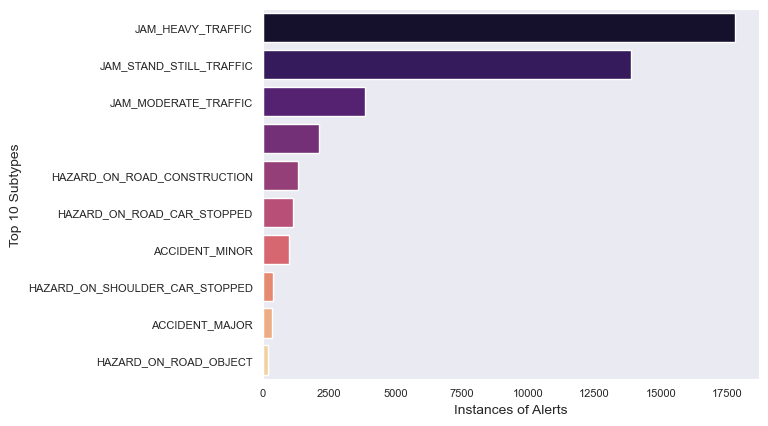

In [237]:
# Are there Jamtypes that have more alerts?

sns.barplot(x="counts", y="subtype", data=count_subtype ,palette='magma')

plt.xticks(rotation=0)
plt.xlabel('Instances of Alerts')
plt.ylabel('Top 10 Subtypes')

plt.savefig('subtype_alerts.png')
plt.show()

#### Convert to CSV

In [229]:
df_j.to_csv('jams.csv')
df_a2.to_csv('alerts.csv')